In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
quantifications = pd.read_csv('./gel_quantifications_2022-02-25.tsv', sep='\t', header=None)

In [4]:
quantifications

,0,1,2,3
0,NEG,control,10860.861,Downstream Rep 1
1,NEG,L3,10284.205,Downstream Rep 1
2,CPSF5,control,11837.690,Downstream Rep 1
3,CPSF5,L3,10902.740,Downstream Rep 1
4,CPSF6,control,11586.569,Downstream Rep 1
5,CPSF6,L3,9054.598,Downstream Rep 1
6,HNRNPCL1,control,11743.740,Downstream Rep 1
7,HNRNPCL1,L3,13498.397,Downstream Rep 1
8,NEG,control,11757.418,Downstream Rep 2
9,NEG,L3,10898.933,Downstream Rep 2


In [5]:
quantifications['reporter'] = quantifications.apply(lambda x: x[3].split('Rep')[0].strip(), axis=1)

In [6]:
quantifications['replicate'] = quantifications.apply(lambda x: x[3].split('Rep')[1].strip(), axis=1)

In [7]:
df_data = []
for r in ['Downstream', 'Upstream']:
    for rep in ['1', '2']:
        quantifications_test = quantifications[(quantifications['reporter']==r)& (quantifications['replicate']==rep)]
        for rbp in quantifications_test[0].unique():
            ctrl = quantifications_test[(quantifications_test[0]==rbp) & (quantifications_test[1]=='control')].iloc[0,2]
            l3 = quantifications_test[(quantifications_test[0]==rbp) & (quantifications_test[1]=='L3')].iloc[0,2]
            print(f'{ctrl}, {l3}, {ctrl/l3}')
            df_data.append([r, rep, rbp, (ctrl/l3)])

df_data_df = pd.DataFrame(df_data, columns=['Reporter', 'Replicate', 'RBP', 'Ratio'])

10860.861, 10284.205, 1.0560720055658168
11837.69, 10902.74, 1.0857536729299242
11586.569, 9054.598, 1.2796337286315747
11743.74, 13498.397, 0.8700099722952288
11757.418, 10898.933, 1.0787678023160614
12461.882, 11374.397, 1.0956081452054116
10508.104, 10447.861, 1.005766060631932
11233.933, 11796.518, 0.952309232266674
11999.397, 10367.205, 1.157437997994638
14062.832, 8332.719, 1.68766425460885
12436.518, 9030.548, 1.3771609430568332
11448.518, 13329.004, 0.8589177405903696
12162.418, 11979.347, 1.0152822186384616
12305.175, 7601.719, 1.618735841195919
10795.276, 7965.548, 1.3552458663233213
11077.761, 11615.468, 0.9537076766945594


In [8]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from statistics import mean
from statistics import stdev

In [9]:
for reporter in ['Upstream', 'Downstream']:
    for rbp in ['CPSF5', 'CPSF6', 'HNRNPCL1']:
        neg = df_data_df[(df_data_df['Reporter']==reporter) & (df_data_df['RBP']=='NEG')]['Ratio'].tolist()
        v = df_data_df[(df_data_df['Reporter']==reporter) & (df_data_df['RBP']==rbp)]['Ratio'].tolist()
        
        t, p = ttest_ind(neg, v, equal_var=False)
        print(reporter, rbp, p)

Upstream CPSF5 0.0420093294834736
Upstream CPSF6 0.15129073873929721
Upstream HNRNPCL1 0.18812957004362416
Downstream CPSF5 0.2562363787793744
Downstream CPSF6 0.6799218893777175
Downstream HNRNPCL1 0.14349572966839505


In [10]:
df_data_df

,Reporter,Replicate,RBP,Ratio
0,Downstream,1,NEG,1.056072
1,Downstream,1,CPSF5,1.085754
2,Downstream,1,CPSF6,1.279634
3,Downstream,1,HNRNPCL1,0.870010
4,Downstream,2,NEG,1.078768
5,Downstream,2,CPSF5,1.095608
6,Downstream,2,CPSF6,1.005766
7,Downstream,2,HNRNPCL1,0.952309
8,Upstream,1,NEG,1.157438
9,Upstream,1,CPSF5,1.687664


In [12]:
df_data_df_copy = df_data_df.copy()
df_data_df_copy['Ratio'] = np.log2(df_data_df_copy['Ratio'])

In [13]:
df_data_df_copy

,Reporter,Replicate,RBP,Ratio
0,Downstream,1,NEG,0.078708
1,Downstream,1,CPSF5,0.118697
2,Downstream,1,CPSF6,0.355731
3,Downstream,1,HNRNPCL1,-0.200896
4,Downstream,2,NEG,0.109384
5,Downstream,2,CPSF5,0.131732
6,Downstream,2,CPSF6,0.008295
7,Downstream,2,HNRNPCL1,-0.070498
8,Upstream,1,NEG,0.210935
9,Upstream,1,CPSF5,0.755028


(-1.0, 1.0)

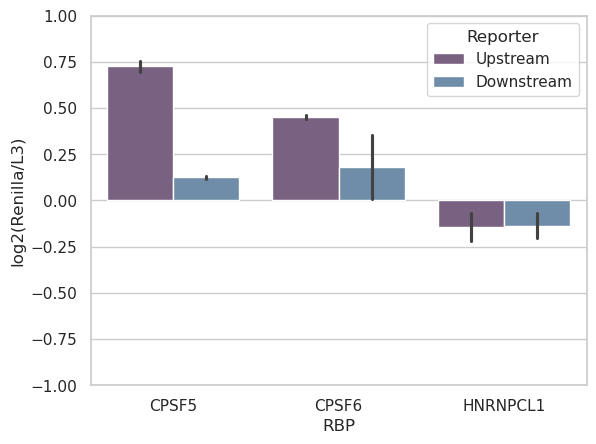

In [14]:
sns.set_theme( style='whitegrid')
sns.barplot(data=df_data_df_copy[df_data_df_copy['RBP'].isin(['CPSF5', 'CPSF6', 'HNRNPCL1'])].sort_values('Reporter', ascending=False), x='RBP', y='Ratio', hue='Reporter', palette=['#7C5D86', '#668EB1'])
plt.ylabel('log2(Renilla/L3)')
plt.ylim(-1,1)
# plt.savefig('gel_quant_022522_log2.png')
# plt.savefig('gel_quant_022522_log2.svg')
# plt.savefig('gel_quant_022522_log2.jpg')